In [1]:
%matplotlib inline


# K-means Clustering


The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.




In [10]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [13]:
print(X[0:5])
print(y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


<IPython.core.display.Javascript object>


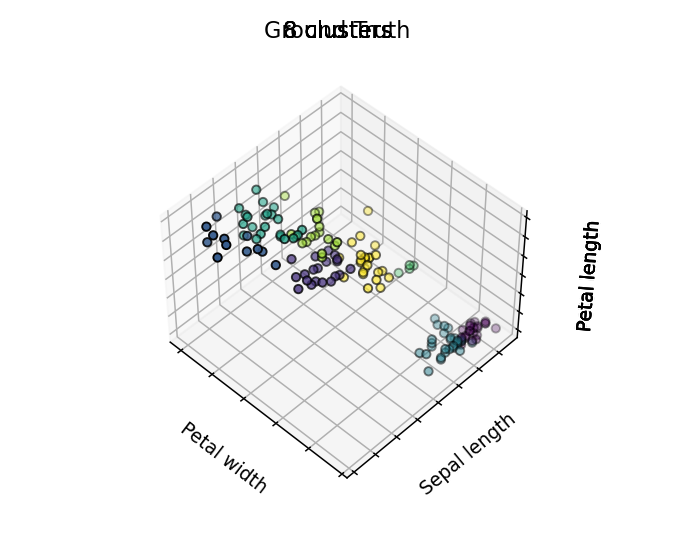

In [35]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib notebook

def plot_3DScatter(X, y):
    plt.rcParams["figure.figsize"] = [5.00, 4.0]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    ax = plt.axes(projection='3d', elev=48, azim=134)
    #ax.plot_surface(x, y, fx)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], cmap='viridis', edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title('Ground Truth')
    ax.dist = 12
    
    for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
        ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
    plt.show()
    
plot_3DScatter(X, y)

In [42]:
from sklearn import metrics

def supervised_metrics(X, y , lables):
    n_clusters_ = len(set(labels))
    print("Estimated number of clusters: ", n_clusters_)
    print("Homogeneity: ", metrics.homogeneity_score(y, labels))
    print("Completeness: ", metrics.completeness_score(y, labels))
    print("V-measure: ", metrics.v_measure_score(y, labels))
    print("Adjusted Rand Index: ", metrics.adjusted_rand_score(y, labels))
    print("Adjusted Mutual Information: ", metrics.adjusted_mutual_info_score(y, labels,
                                               average_method='arithmetic'))
    print("Silhouette Coefficient: ", metrics.silhouette_score(X, labels))

Score: -30.064593073593077
Labels [3 0 0 0 3 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 0 3 3 3 0 0 3 3 3 0 0 3
 3 0 3 3 0 0 3 3 0 3 0 3 0 1 1 1 7 1 7 1 5 1 7 5 7 7 1 7 1 7 7 1 7 6 7 6 1
 1 1 1 1 1 7 7 7 7 6 7 1 1 1 7 7 7 1 7 5 7 7 7 1 5 7 4 6 2 4 4 2 7 2 4 2 4
 6 4 6 6 4 4 2 2 6 4 6 2 6 4 2 6 6 4 2 2 2 4 6 6 2 4 4 6 4 4 4 6 4 4 4 6 4
 4 6]
Centroids [[4.70454545 3.12272727 1.41363636 0.2       ]
 [6.43       2.94       4.59       1.435     ]
 [7.475      3.125      6.3        2.05      ]
 [5.24285714 3.66785714 1.5        0.28214286]
 [6.56818182 3.08636364 5.53636364 2.16363636]
 [5.         2.3        3.275      1.025     ]
 [6.02777778 2.73333333 5.02777778 1.79444444]
 [5.62083333 2.69166667 4.075      1.2625    ]]
MSE of all points to the closest cluster 30.064593073593088
Estimated number of clusters:  8
Homogeneity:  0.9255604738929599
Completeness:  0.5106133716599915
V-measure:  0.6581425441120513
Adjusted Rand Index:  0.4570179139974683
Adjusted Mutual Information:  0.646645255

<IPython.core.display.Javascript object>


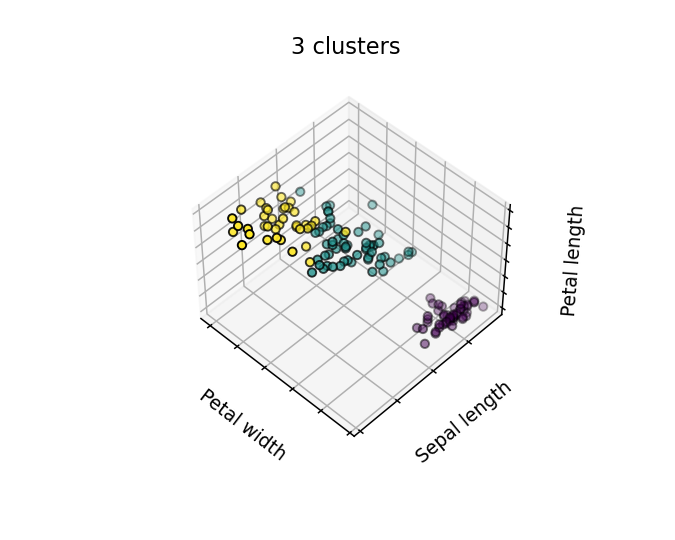

Score: -78.85144142614602
Labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Centroids [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
MSE of all points to the closest cluster 78.851441426146
Estimated number of clusters:  3
Homogeneity:  0.7514854021988338
Completeness:  0.7649861514489815
V-measure:  0.7581756800057784
Adjusted Rand Index:  0.7302382722834697
Adjusted Mutual Information:  0.7551191675800483
Silhouette Coefficient:  0.5528190123564091


<IPython.core.display.Javascript object>


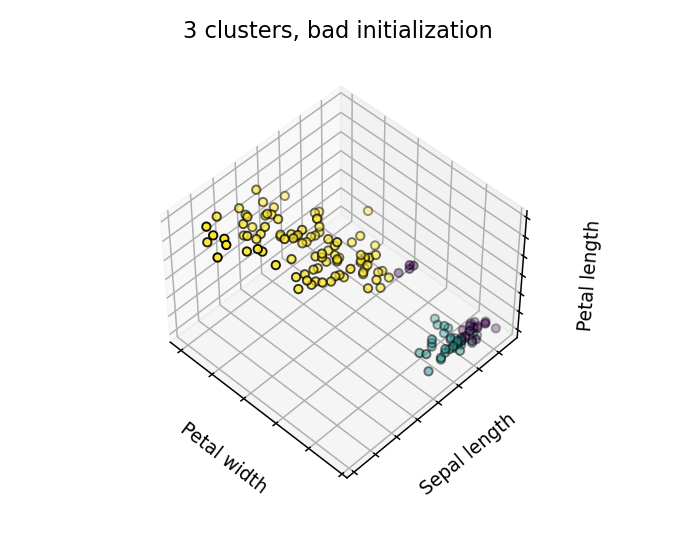

Score: -142.75406250000006
Labels [1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 1 1 0 0 1 1 0 1 0 1 1 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Centroids [[4.73181818 2.92727273 1.77272727 0.35      ]
 [5.19375    3.63125    1.475      0.271875  ]
 [6.31458333 2.89583333 4.97395833 1.703125  ]]
MSE of all points to the closest cluster 142.7540625000001
Estimated number of clusters:  3
Homogeneity:  0.5334123630245353
Completeness:  0.6534912017065123
V-measure:  0.5873776041729258
Adjusted Rand Index:  0.4289511167236898
Adjusted Mutual Information:  0.5816229049100765
Silhouette Coefficient:  0.5185675688773275


In [43]:
from sklearn.cluster import KMeans
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(5, 4))

    ax = plt.axes(projection='3d', elev=48, azim=134)
    est.fit(X)
    print("Score:", est.score(X))
    labels = est.labels_
    print("Labels", labels)
    print("Centroids", est.cluster_centers_)
    print("MSE of all points to the closest cluster", est.inertia_)
    supervised_metrics(X, y, labels)
    
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    fig.show()

In [8]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o